# Lab 2 - Implementing and evaluating regression

## Goals of this lab:

  - calling regression functions from other packages
  - selecting variables to use in linear models
  - evaluating regression performance

## Recall/prereqs:

 - manipulating data with Pandas
 - basic plotting



In [2]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

import pandas as pd
import seaborn as sns
sns.set()

## Instructions

I've downloaded a dataset and renamed it. You will be (a) trying to figure out what this data is and where it comes from, (b) performing some data exploration, and (c) trying out some regression tasks.

This lab is broken up into questions. Respond to each part of each question. There is no fixed/minimum length for responses: make sure that you address each of the specific points raised in each question, and that you explain/justify your reasoning. Some questions will specifically ask for plots, in others plots are optional.



In [3]:
df = pd.read_csv('mystery_dataset.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# L2.1 CSI Data science

What is this dataset about? Where did I get it? Who originated it? The answers are yours to find.

#### (a) Brainstorming

Based on the variables present in this dataset, what do you think this data is about? Feel free to Google the variable names if you'd like.

**The data appears to be about some kind of alcoholic drink** 

#### (b) Let's go searching

Once you think you know what this data is about, try to find the dataset on the internet. Some hints/suggestions include:

- good Google queries would be things like "data about YOUR\-GUESS\-HERE" \+ some variable name from this dataset
- check out websites we've mentioned are resources for finding good datasets

**Url where data is located: \[**[**https://www.kaggle.com/datasets/ruthgn/wine\-quality\-data\-set\-red\-white\-wine**](https://www.kaggle.com/datasets/ruthgn/wine-quality-data-set-red-white-wine) **\]\(**[**https://datauab.github.io/red\_wine\_quality/**](https://datauab.github.io/red_wine_quality/)**\)**

**Data is about red and wine quality**

#### (c) Understanding our data

Once you've found the dataset online, find and answer the following questions:

- What is the **original** source of this data? Can you provide a link or a citation?
- Can you find an explanation for what each of these variables is/how they were gathered? Pick two variables (other than "quality") and give a brief explanation of what they are.

**Combined the 2 data sets on:** [**https://archive.ics.uci.edu/ml/datasets/wine\+quality**](https://archive.ics.uci.edu/ml/datasets/wine+quality)**, from Paulo Cortez, University of Minho, Guimarães, Portugal.**

**fixed acidity: The acids that naturally occur in the grapes used to ferment the wine and carry over into the wine, mostly consisting of tartaric, malic, citric or succinic acid and do not evaporate easily, measured in g / dm^3**

**volatile acidity: Acids that evaporate at low temperatures—mainly acetic acid which is undesirable at very high levels, measured in g / dm^3.**



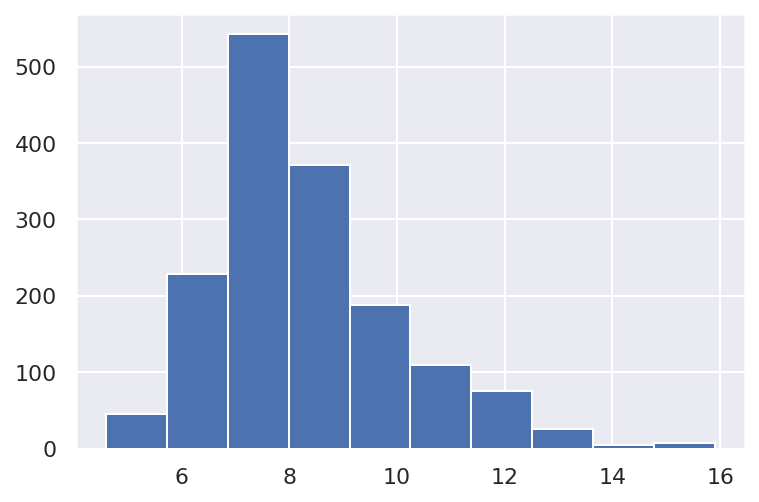

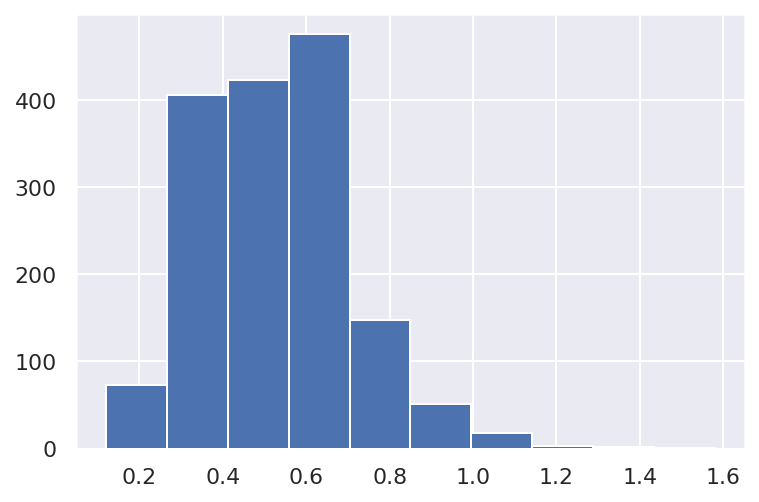

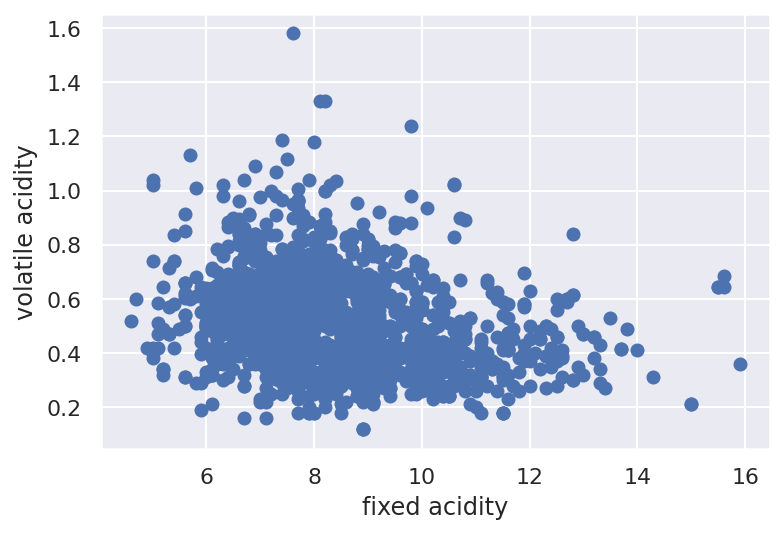

In [4]:
plt.hist(df.loc[:,"fixed acidity"])
plt.show()
plt.hist(df.loc[:,"volatile acidity"])
plt.show()
plt.scatter(df.loc[:,"fixed acidity"],df.loc[:,"volatile acidity"])
plt.xlabel("fixed acidity")
plt.ylabel("volatile acidity")
plt.show()

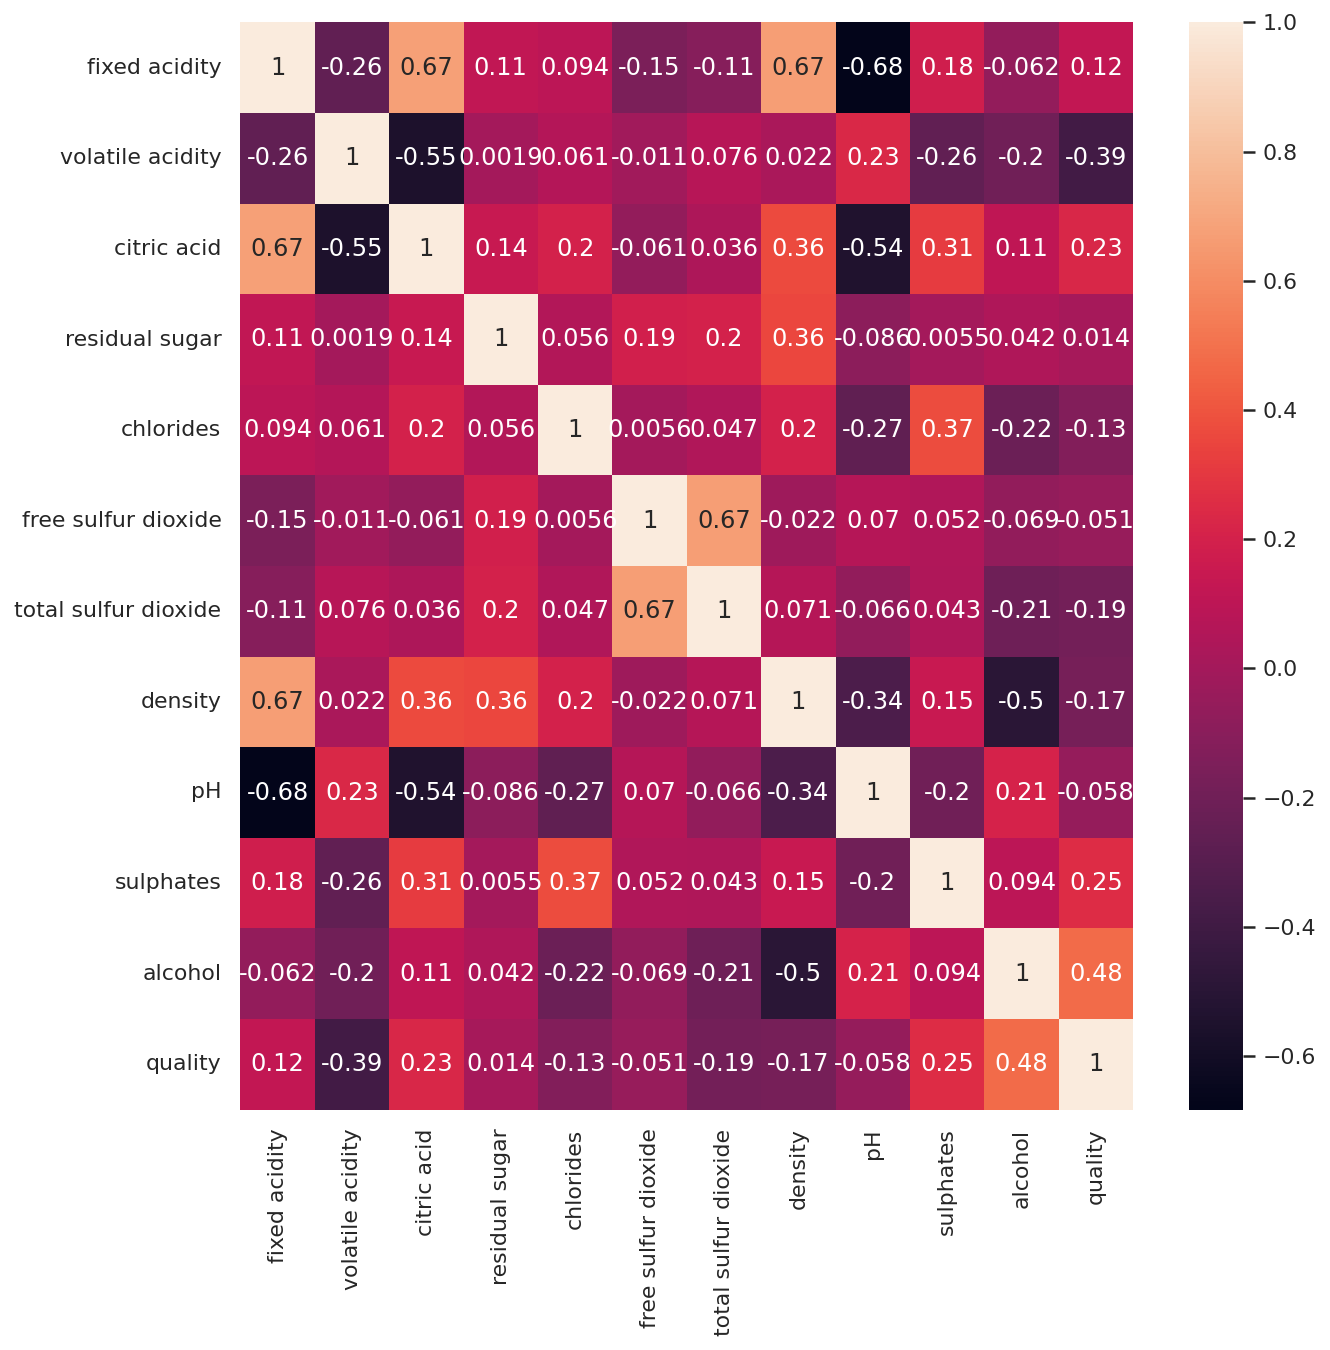

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(df.corr(),annot = True)

# L2.2 Data exploration

Now that we know what this data is, let's start analyzing it as data scientists. 

#### (a) Understand our variables.

We've already started the first part, "understanding the data," in part (c) above. Let's look a little further.

- Do we have any missing data? If so, discuss.
- What is "quality" referring to?

**No missing data, quality refers to the rating given by wine experts.**

#### (b) See the "big picture"

Take the two non-"quality" variables you explained in part (c) above, and examine their distributions. Are they unimodal, bimodal, or multi-modal distributions? Are there any outliers present in the dataset?

**Both fixed and volatile acidity have unimodal distributions, both have outliers at the higher end**

#### (c) Explore trends

Are there strong relationships between any of these variables? What does the correlation matrix look like?

**PH and fixed acidity, citric acid and volatile acidity, along with citric acid and pH are the most negatively correlated data pairs in the dataset**

**Citric acid and fixed acidity, density and fixed acidity, along with** **free sulfur dioxide and total sulfur dioxide are the most positively correlated data pairs in the dataset**

#### (d) Red flags

Open-ended question: given what you've found in the course of your data exploration, in addition to the information you've found online about where this data originated, is this data trustworthy?

**Yes, as it originates from credible institutions, namely the UCI Machine Learning Repository and is utilized by Kaggle, a large and generally credible platform for hosting data**



# L2.3 Making predictions using regression

We'll try to predict the "quality" using the other variables in the dataset. We'll call methods from scipy or sklearn to perform different regression analyses:



In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

# A throwaway dataframe for demonstrating how to perform each method.
x1_vals = np.linspace(0,10,100)
x2_vals = np.random.normal(size=100)
dummy_x_vals = np.random.normal(size=100)
dummy_df = pd.DataFrame(
    {
        'x_1':x1_vals,
        'x_2':x2_vals,
        'linear_y':1.5*x1_vals+0.01*x2_vals+np.random.normal(size=100),
        'quadratic_y':np.power(dummy_x_vals,2)+np.random.normal(scale = 10,size=100)
    }
)

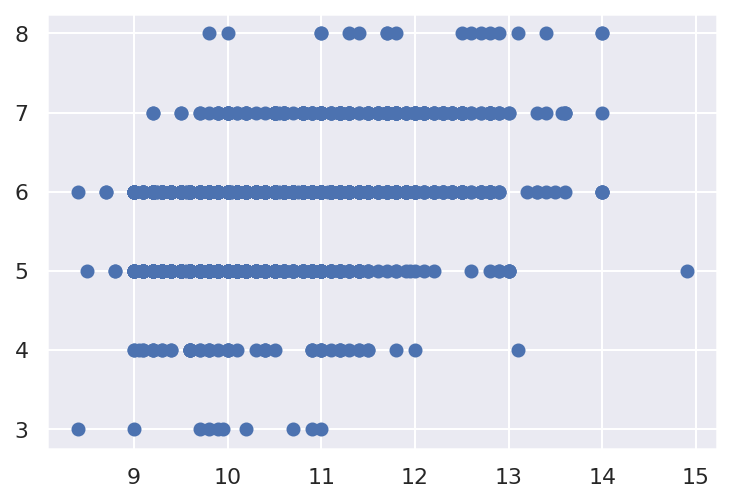

In [7]:
plt.scatter(df.loc[:,"alcohol"],df.loc[:,"quality"])
plt.show()

For each method, I've provided an example of how to perform the method using functions from sklearn.

#### (a) Simple linear regression

Which of the independent variables (i.e. variables other than "quality") provides the best linear model for quality? Interpret the results of the linear regression:

- What does the $R^2$ value indicate?
  - the r^2 value indicates low correlation between alcohol and wine quality, because the number is very low
- Does the relationship actually appear to be linear?
  - no the relationship does not appear to be linear, as shown by the poor r2 value



slope= 0.3608417653350347
intercept= 1.8749748869971508
R^2= 0.22673436811275482


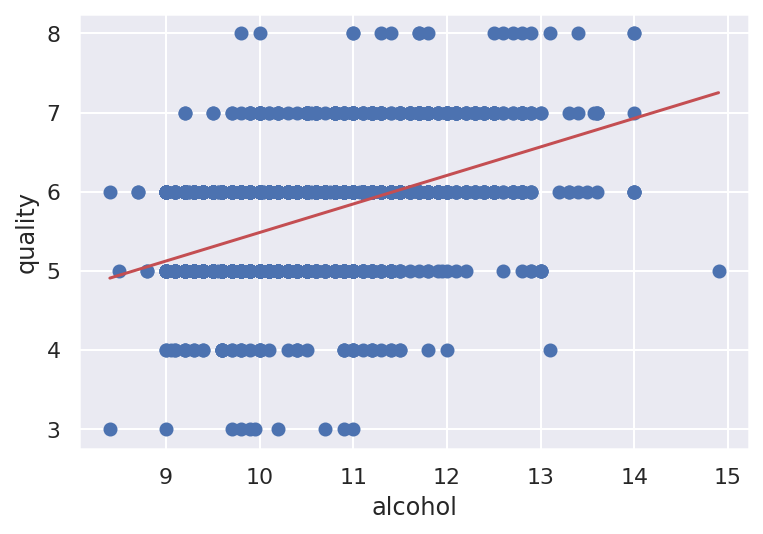

In [8]:
# Example: performing simple linear regression with sklearn
lm = LinearRegression()
x = df[['alcohol']]
y = df['quality']
lm.fit(x, y) 
print("slope=", lm.coef_[0])
print("intercept=", lm.intercept_)

plt.plot(x,y,'o',label='original data')
print("R^2=",lm.score(x,y))
x_test = np.linspace(x.min(), x.max(), 100)
plt.plot(x_test, lm.coef_[0]*x_test+lm.intercept_,c='r', label="Model")
plt.xlabel("alcohol")
plt.ylabel("quality")
plt.show()


#### (b) Multiple linear regression

What happens when we use more than one independent variable in our linear model? Play around and decide which combination of independent variables yields the best prediction for "quality" under a multilinear model. Of these variables, which is most influential?

**Using all of the variables is the combination that yields the lowest r^2 value, of all of the variables, alcohol is the most influential**



coefficients= [-5.41795129e-01  2.76197699e-01  2.49905527e-02 -5.41795129e-01
 -1.87422516e+00  1.63312698e-02 -1.82563948e-01 -4.13653144e-01
  9.16334413e-01 -1.78811638e+01  4.36133331e-03 -3.26457970e-03]
intercept= 21.965208449448554
R^2= 0.3605517030386882


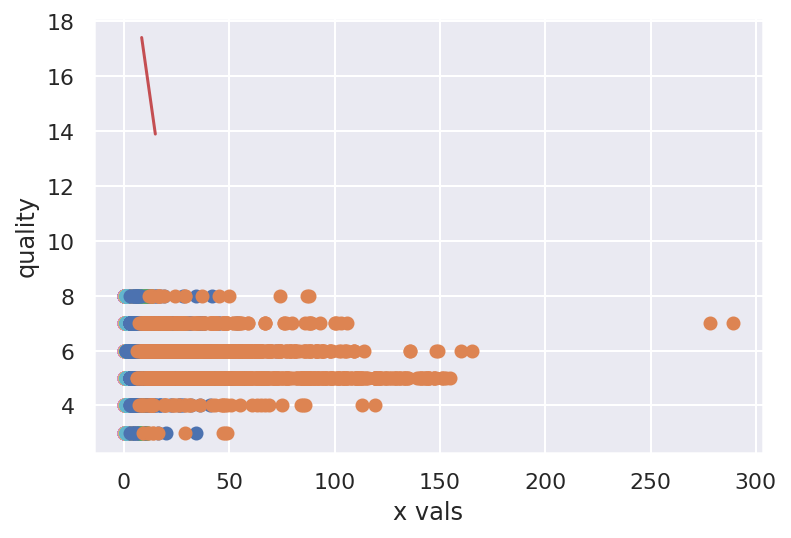

In [11]:
# Example: multiple linear regression
lm = LinearRegression() # initialize the model object
x = df[['volatile acidity','alcohol', 'fixed acidity', 'volatile acidity', 'chlorides','residual sugar', 'citric acid', 'pH', 'sulphates', 'density','free sulfur dioxide', 'total sulfur dioxide']]
y = df['quality']
lm.fit(x, y)

# retrieve the coefficients and intercept term learned by the model
print("coefficients=", lm.coef_)
print("intercept=", lm.intercept_)

# get the R^2 value
print("R^2=",lm.score(x,y))
plt.plot(x,y, 'o')
plt.plot(x_test, lm.coef_[0]*x_test+lm.intercept_,c='r', label="wine")
plt.xlabel("x vals")
plt.ylabel('quality')
plt.show()

#### (c) Polynomial regression

Why constrain ourselves to linear models? Go crazy, try modeling quality as a polynomial function of inputs. Do any of these seem like an improvement over the linear models? Use my fit_polynomial_curve command.

**The polynomial regression model isn't as much of an improvement from linear regression as I would expect. In fact, multi\-linear regression performed better, and seems like a more optimal choice for this dataset.**


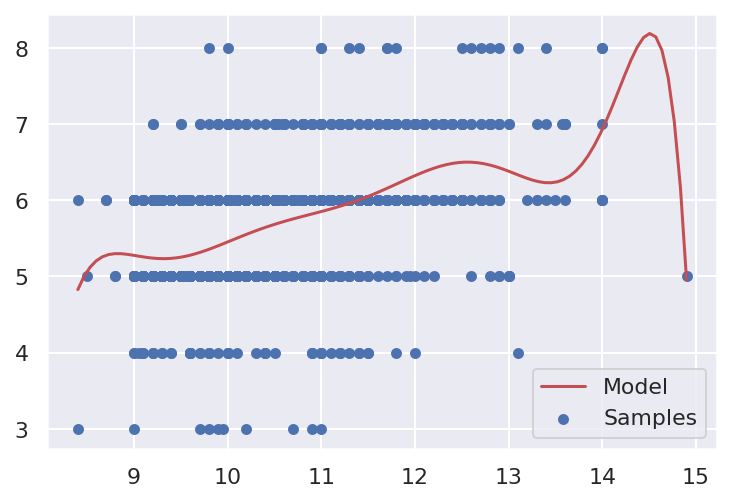

r^2: 0.2397333951316849


In [17]:
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
# takes independent variables in x and dependent variables in y, both 1-dimensional dataframes, and an integer-valued degree.
# fits a polynomial of specified degree to data (x,y) and generates a basic plot
# returns pipeline, an sklearn estimator.
# For more information on what methods pipeline supports, see https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
def fit_polynomial_curve(x,y,degree):
    # In sklearn, we perform polynomial regression in two steps: first we create new "dummy"
    # versions of our independent data x^2, x^3, ... up to x^degree. Then we use linear 
    # regression to find the coefficients that best describe our data as
    #       y = a_1 x + a_2 x^2 + a_3 x^3 + ....
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    # we need to reshape our input to .fit()
    numpy_x = x.to_numpy()
    pipeline.fit(numpy_x[:, np.newaxis], y)

    x_test = np.linspace(x.min(), x.max(), 100)
    plt.plot(x_test, pipeline.predict(x_test[:, np.newaxis]),c='r', label="Model")

    plt.scatter(x, y, edgecolor="b", s=20, label="Samples")
    plt.legend()
    plt.show()
    print('r^2:', r2_score(y, pipeline.predict(x[:, np.newaxis])))
    return pipeline

# Example: fitting a 2nd degree polynomial with independent variable 'sulphates'
x = df['alcohol']
y = df['quality']

pipe = fit_polynomial_curve(x,y,10)